In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
nu = np.linspace(0,2*np.pi,100)
a=1.5
e=0.7
r = a*(1-e**2)/(1+e*np.cos(nu))

In [ ]:
P = 3
t = np.linspace(0,P,100)

def nuoft(t): #true anomaly as a function of time
    T = 0
    M = 2*np.pi*(t-T)/P
   
    #Numerically solving M = E-e*sinE
    E_n1 = M
    E_n0 = 0
    
    while abs(E_n1-E_n0)>0.1:
        temp = M + e*np.sin(E_n1)
        E_n0 = E_n1
        E_n1 = temp
    
    E = E_n1
    
    nu = np.arccos((np.cos(E)-e)/(1-e*np.cos(E)))
    if E>np.pi: #Accounting for the limited range of arccos
        nu = 2*np.pi - nu
        
    return nu

### Ellipse in Polar Coordinates:

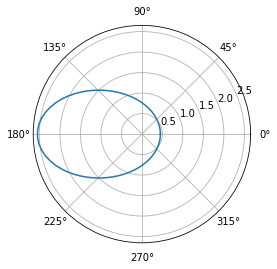

In [ ]:
plt.polar(nu,r)

In [ ]:
i = np.pi/3
Omega = np.pi/4
omega = np.pi

In [ ]:
def unitVector(nu):
    n_x = -np.cos(i)*np.cos(Omega)*np.sin(omega+nu)-np.sin(Omega)*np.cos(omega+nu)
    n_y = np.cos(Omega)*np.cos(omega+nu)-np.cos(i)*np.sin(Omega)*np.sin(omega+nu)
    n_z = np.sin(i)*np.sin(omega+nu)
    return np.array([n_x,n_y,n_z])

position = np.array([r*unitVector(nu)[0],r*unitVector(nu)[1],r*unitVector(nu)[2]])

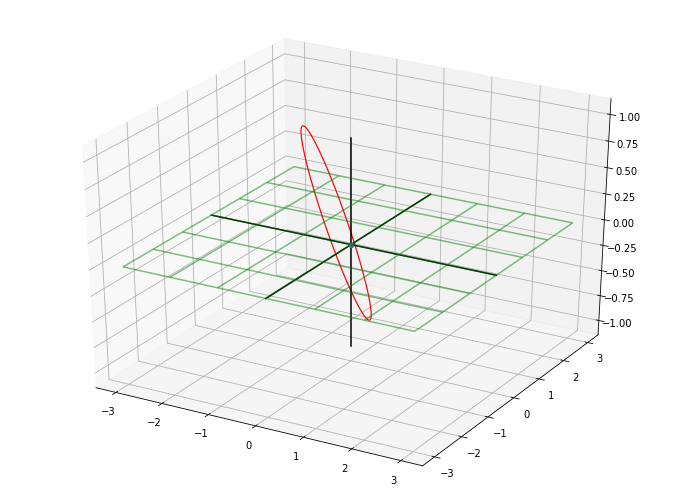

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
ax._axis3don = True

ax.plot(*position, "-r", linewidth = 1.2)
ax.scatter(0,0,0)

xx, yy = np.meshgrid(range(-3,4), range(-3,4))
zz = xx*0
ax.plot_wireframe(xx, yy, zz, color='green',alpha=0.5)

ax.plot((0,0),(-3,3),(0,0),c='black')
ax.plot((-3,3),(0,0),(0,0),c='black')
ax.plot((0,0),(0,0),(-1,1),c='black')

plt.show()

## Projection:


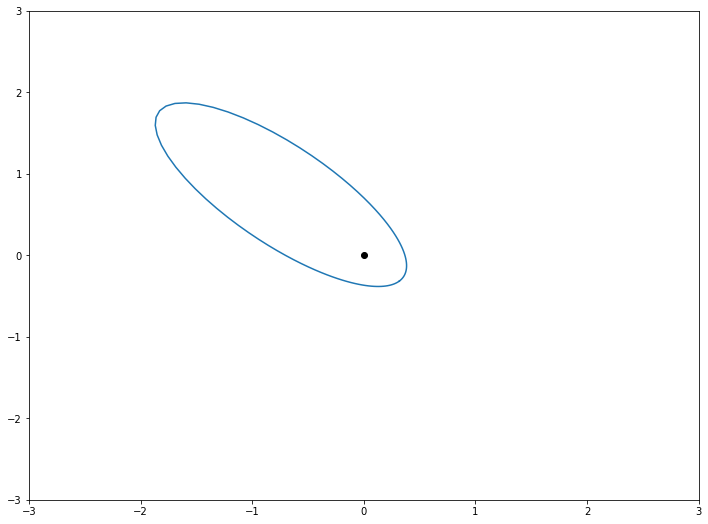

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(position[0],position[1])
plt.scatter(0,0, c='black')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

## Intersectional Area:

In [ ]:
def intersectional_area(p,R_p, s,R_s):#p and s are Cartesian coordinates
    d = np.linalg.norm(p-s)
    if (d < R_p + R_s):
        a = R_p**2
        b = R_s**2

        x = (a-b+d**2)/(2*d)
        z = x**2
        y = np.sqrt(a - z)

        if (d <= abs(R_s - R_p)):
            return np.pi*min(a, b)
        return a * np.arcsin(y / R_p) + b * np.arcsin(y / R_s) - y * (x + np.sqrt(z + b - a))
    return 0

def intersectional_area_d(d,R_p,R_s):#p and s are Cartesian coordinates
    if (d < R_p + R_s):
        a = R_p**2
        b = R_s**2

        x = (a-b+d**2)/(2*d)
        z = x**2
        y = np.sqrt(a - z)

        if (d <= abs(R_s - R_p)):
            return np.pi*min(a, b)
        return a * np.arcsin(y / R_p) + b * np.arcsin(y / R_s) - y * (x + np.sqrt(z + b - a))
    return 0

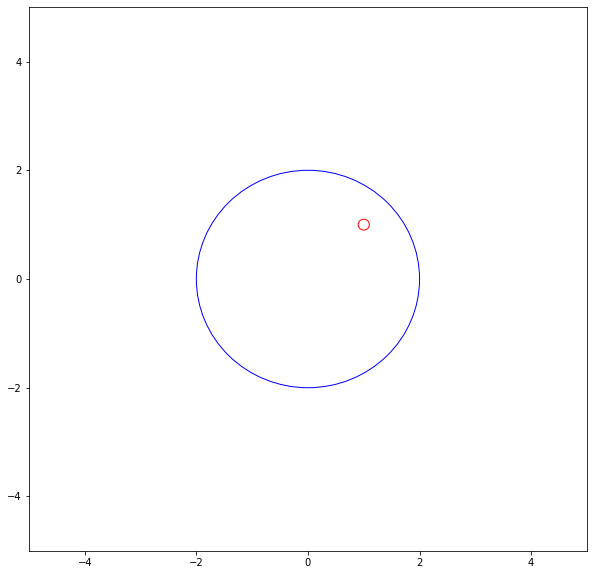

Common Area 0.031415926535897934
Common Area 0.031415926535897934


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


In [ ]:
plt.figure(figsize=(10,10))
ax = plt.gcf().gca()

circle1=plt.Circle([1,1],0.1,color='r',fill=False)
ax.add_artist(circle1)

circle2=plt.Circle([0,0],2,color='b',fill=False)
ax.add_artist(circle2)

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
print('Common Area',intersectional_area(np.array([1,1]),0.1,np.array([0,0]),2))
print('Common Area',intersectional_area_d(np.linalg.norm(np.array([1,1])-np.array([0,0])),0.1,2))